In [1]:
# dataset
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)

N = data.shape[0]
X = data[:,:3]
y = data[:,3:]

maxi = np.max(X)
mini = np.min(X)
avg = np.mean(X)
X = (X-avg) / (maxi-mini)

X_b = np.c_[np.ones((N, 1)), X]

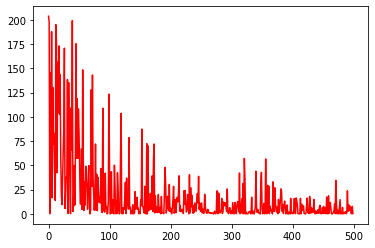

In [2]:
def stochastic_gradient_descent():
    n_epochs = 50
    learning_rate = 0.01
    
    # khởi tạo giá trị tham số
    thetas = np.random.randn(4, 1)
    
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(n_epochs):
        for i in range(N):
            # lấy ngẫu nhiên 1 sample
            random_index = np.random.randint(N)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            
            # tính output 
            oi = xi.dot(thetas)
            
            # tính loss li
            li = (oi - yi)*(oi - yi)
            
            # tính gradient cho loss
            g_li = 2*(oi - yi)
            
            # tính gradient 
            gradients = xi.T.dot(g_li)
                        
            # update giá trị theta
            thetas = thetas - learning_rate*gradients
            
            # logging
            thetas_path.append(thetas)            
            losses.append(li[0][0])

    return thetas_path, losses

bgd_thetas, losses = stochastic_gradient_descent()

# in loss cho 500 sample đầu
x_axis = list(range(500))
plt.plot(x_axis,losses[:500], color="r")
plt.show()

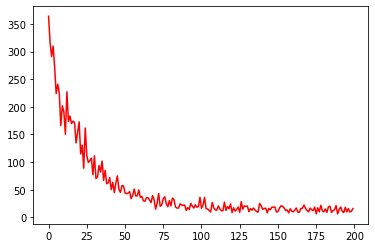

In [3]:
def mini_batch_gradient_descent():
    n_iterations = 50
    minibatch_size = 20
    
    thetas = np.random.randn(4, 1)
    thetas_path = [thetas]    
    losses = []
    
    for epoch in range(n_iterations):
        shuffled_indices = np.random.permutation(N)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
                
        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            
            # tính output 
            output = xi.dot(thetas)
            
            # tính loss
            loss = (output - yi)**2
            
            # tính đạo hàm cho loss
            loss_grd = 2*(output - yi)/minibatch_size
            
            # tính đạo hàm cho các tham số
            gradients = xi.T.dot(loss_grd)
            
            # cập nhật tham số
            learning_rate = 0.01
            thetas = thetas - learning_rate*gradients
            thetas_path.append(thetas)
            
            loss_mean = np.sum(loss)/minibatch_size
            losses.append(loss_mean)

    return thetas_path, losses

mbgd_thetas, losses = mini_batch_gradient_descent()

# in loss cho 100 sample đầu
x_axis = list(range(200))
plt.plot(x_axis,losses[:200], color="r")
plt.show()

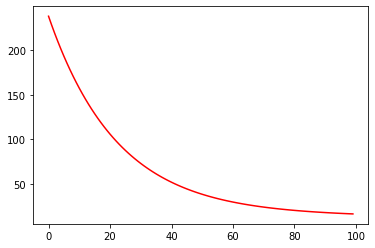

In [4]:
def batch_gradient_descent():
    n_iterations = 100
    learning_rate = 0.01
    
    # khởi tạo giá trị tham số
    thetas = np.random.randn(4, 1)
    thetas_path = [thetas]
    losses = []
    
    for i in range(n_iterations):
        # tính output
        output = X_b.dot(thetas)
        
        # tính loss
        loss = (output - y)**2        
                
        # tính đạo hàm cho loss
        loss_grd = 2*(output - y)/N
        
        # tính đạo hàm cho các tham số
        gradients = X_b.T.dot(loss_grd)
        
        # cập nhật tham số
        thetas = thetas - learning_rate*gradients
        thetas_path.append(thetas)
        
        mean_loss = np.sum(loss)/N
        losses.append(mean_loss)

    return thetas_path, losses

bgd_thetas, losses = batch_gradient_descent()

# in loss cho 100 sample đầu
x_axis = list(range(100))
plt.plot(x_axis,losses[:100], color="r")
plt.show()